# Imports


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
import string

# Config

In [10]:
# Frequenzbänder inkl. "alle Frequenzen"
bands = {
    'Low (0.01–0.06 Hz)': (0.01, 0.06),
    'Mid (0.06–0.12 Hz)': (0.06, 0.12),
    'High (0.12–0.2 Hz)': (0.1, 0.2),
    'All Frequencies': (0.01, 2)
}
band_labels = list(bands.keys())
outpath_adr = "C:/Bachelorarbeit/figures/Geschwindigkeit/ADRRLAS/"
outpath_ROMYRLAS = "C:/Bachelorarbeit/figures/Geschwindigkeit/ROMYRLAS/"
outpath_FURWET = "C:/Bachelorarbeit/figures/Geschwindigkeit/FURWET/"
font_title=17
font_ax=13
font_leg=11

# ADR/RLAS und ROMY/RLAS

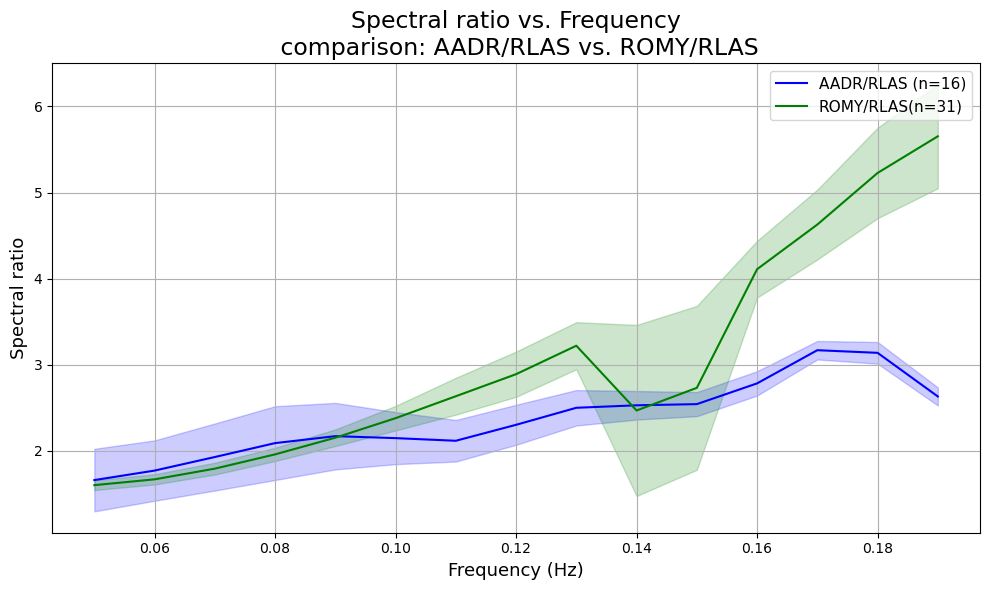

In [11]:

# CSVs laden
df_aadr = pd.read_csv(outpath_adr + "spektralanalyse_ergebnisse_aadr.csv")
df_z = pd.read_csv(outpath_ROMYRLAS + "spektralanalyse_ergebnisse_z.csv")

# Frequenzen aus den Spaltennamen extrahieren
ratio_cols = [col for col in df_aadr.columns if col.startswith('ratio_')]
freqs = np.array([float(col.split('_')[1][:-2]) for col in ratio_cols])  # z.B. ratio_0.05Hz → 0.05

# Mittelwerte (über alle Backazimute oder Events)
mean_aadr = df_aadr[ratio_cols].mean(axis=0).values
std_aadr = df_aadr[ratio_cols].sem(axis=0).values

mean_z = df_z[ratio_cols].mean(axis=0).values
std_z = df_z[ratio_cols].sem(axis=0).values

# Plot
plt.figure(figsize=(10, 6))

plt.plot(freqs, mean_aadr, color='blue', label=f"AADR/RLAS (n={len(df_aadr)})")
plt.fill_between(freqs, mean_aadr - std_aadr, mean_aadr + std_aadr, color='blue', alpha=0.2)

plt.plot(freqs, mean_z, color='green', label=f"ROMY/RLAS(n={len(df_z)})")
plt.fill_between(freqs, mean_z - std_z, mean_z + std_z, color='green', alpha=0.2)

plt.xlabel("Frequency (Hz)",fontsize=font_ax)
plt.ylabel("Spectral ratio",fontsize=font_ax)
plt.title("Spectral ratio vs. Frequency\n comparison: AADR/RLAS vs. ROMY/RLAS",fontsize=font_title)
plt.legend(fontsize=font_leg)
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Bachelorarbeit/figures/Geschwindigkeit/ratio_vs_frequency_ADRundROMYRLAS.png", dpi=300)
plt.show()


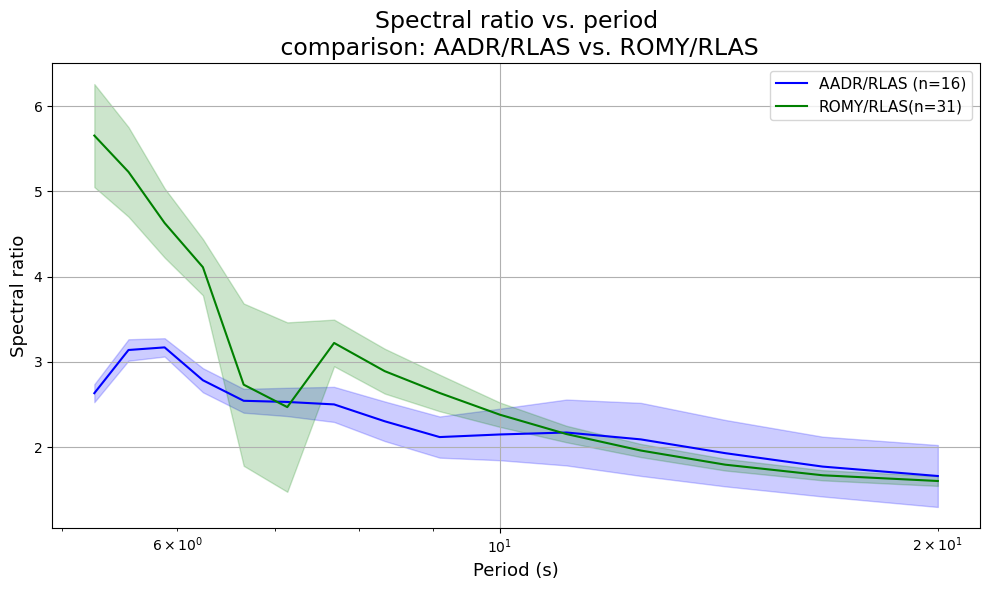

In [12]:

# CSVs laden
df_aadr = pd.read_csv(outpath_adr + "spektralanalyse_ergebnisse_aadr.csv")
df_z = pd.read_csv(outpath_ROMYRLAS + "spektralanalyse_ergebnisse_z.csv")

# Frequenzen aus den Spaltennamen extrahieren
ratio_cols = [col for col in df_aadr.columns if col.startswith('ratio_')]
freqs = np.array([float(col.split('_')[1][:-2]) for col in ratio_cols])  # z.B. ratio_0.05Hz → 0.05
periods = [1.0 / f for f in freqs]
# Mittelwerte (über alle Backazimute oder Events)
mean_aadr = df_aadr[ratio_cols].mean(axis=0).values
sem_aadr = df_aadr[ratio_cols].sem(axis=0).values

mean_z = df_z[ratio_cols].mean(axis=0).values
sem_z = df_z[ratio_cols].sem(axis=0).values

# Plot
plt.figure(figsize=(10, 6))

plt.plot(periods, mean_aadr, color='blue', label=f"AADR/RLAS (n={len(df_aadr)})")
plt.fill_between(periods, mean_aadr - sem_aadr, mean_aadr + sem_aadr, color='blue', alpha=0.2)

plt.plot(periods, mean_z, color='green', label=f"ROMY/RLAS(n={len(df_z)})")
plt.fill_between(periods, mean_z - std_z, mean_z + std_z, color='green', alpha=0.2)
plt.xscale('log')
plt.xlabel("Period (s)",fontsize=font_ax)
plt.ylabel("Spectral ratio",fontsize=font_ax)
plt.title("Spectral ratio vs. period\n comparison: AADR/RLAS vs. ROMY/RLAS",fontsize=font_title)
plt.legend(fontsize=font_leg)
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Bachelorarbeit/figures/Geschwindigkeit/ratio_vs_periode_ADRundROMYRLAS.png", dpi=300)
plt.show()


# FURWET und ROMYRLAS

In [13]:
# CSVs laden
df_aadr = pd.read_csv(outpath_FURWET + "spektralanalyse_ergebnisse_Z.csv")
df_z = pd.read_csv(outpath_ROMYRLAS + "spektralanalyse_ergebnisse_z.csv")

# Frequenzen aus den Spaltennamen extrahieren
ratio_cols = [col for col in df_aadr.columns if col.startswith('ratio_')]
freqs = np.array([float(col.split('_')[1][:-2]) for col in ratio_cols]) 

# Mittelwerte (über alle Backazimute oder Events)
mean_aadr = df_aadr[ratio_cols].mean(axis=0).values
std_aadr = df_aadr[ratio_cols].sem(axis=0).values

mean_z = df_z[ratio_cols].mean(axis=0).values
std_z = df_z[ratio_cols].sem(axis=0).values

# Plot
plt.figure(figsize=(10, 6))

plt.plot(freqs, mean_aadr, color='blue', label=f"FUR/WET (n={len(df_aadr)})")
plt.fill_between(freqs, mean_aadr - std_aadr, mean_aadr + std_aadr, color='blue', alpha=0.2)

plt.plot(freqs, mean_z, color='green', label=f"ROMY/RLAS (n={len(df_z)})")
plt.fill_between(freqs, mean_z - std_z, mean_z + std_z, color='green', alpha=0.2)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral ratio")
plt.title("Spectral ratio vs. frequency\nComparison: FUR/WET and ROMY/RLAS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Bachelorarbeit/figures/Geschwindigkeit/ratio_vs_frequency_FURundROMY.png", dpi=300)
plt.close()


KeyError: "['ratio_0.2100Hz', 'ratio_0.2600Hz', 'ratio_0.3100Hz', 'ratio_0.3600Hz', 'ratio_0.4100Hz', 'ratio_0.4600Hz', 'ratio_0.5100Hz', 'ratio_0.5600Hz', 'ratio_0.6100Hz', 'ratio_0.6600Hz', 'ratio_0.7100Hz', 'ratio_0.7600Hz', 'ratio_0.8100Hz', 'ratio_0.8600Hz', 'ratio_0.9100Hz', 'ratio_0.9600Hz', 'ratio_1.0100Hz', 'ratio_1.0600Hz', 'ratio_1.1100Hz', 'ratio_1.1600Hz', 'ratio_1.2100Hz', 'ratio_1.2600Hz', 'ratio_1.3100Hz', 'ratio_1.3600Hz', 'ratio_1.4100Hz', 'ratio_1.4600Hz', 'ratio_1.5100Hz', 'ratio_1.5600Hz', 'ratio_1.6100Hz', 'ratio_1.6600Hz', 'ratio_1.7100Hz', 'ratio_1.7600Hz', 'ratio_1.8100Hz', 'ratio_1.8600Hz', 'ratio_1.9100Hz'] not in index"